## download the data set form this link

https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/code

In [64]:
import pandas as pd
data = pd.read_csv("Data/Training_set.csv")

In [65]:
data.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [66]:
data['path'] = 'Data/train/' + data['filename']
data.head()

,filename,label,path
0,Image_1.jpg,SOUTHERN DOGFACE,Data/train/Image_1.jpg
1,Image_2.jpg,ADONIS,Data/train/Image_2.jpg
2,Image_3.jpg,BROWN SIPROETA,Data/train/Image_3.jpg
3,Image_4.jpg,MONARCH,Data/train/Image_4.jpg
4,Image_5.jpg,GREEN CELLED CATTLEHEART,Data/train/Image_5.jpg


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
 2   path      6499 non-null   object
dtypes: object(3)
memory usage: 152.4+ KB


In [68]:
class_num = data['label'].nunique()
print("number of unique classes", class_num)

number of unique classes 75


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

##### more info about seaborn.countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html

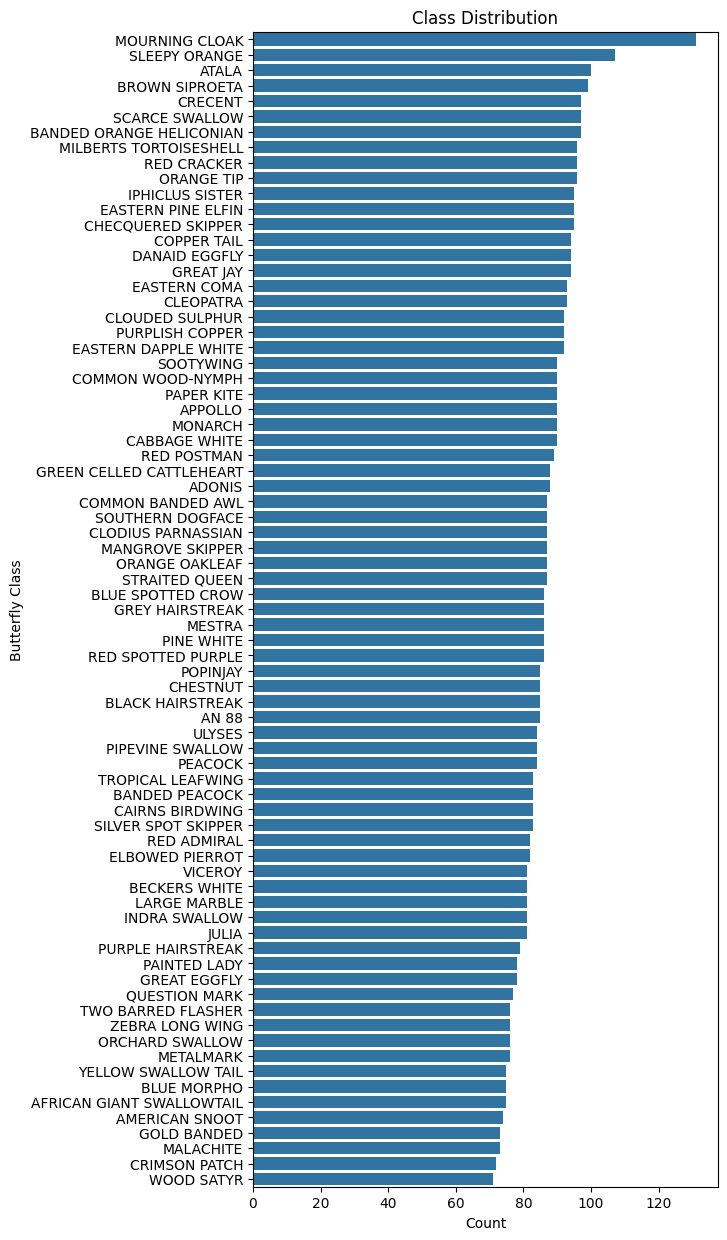

In [70]:
plt.figure(figsize=(6, 15))
sns.countplot(y='label', data=data, order=data['label'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Butterfly Class')
plt.title('Class Distribution')
plt.show()

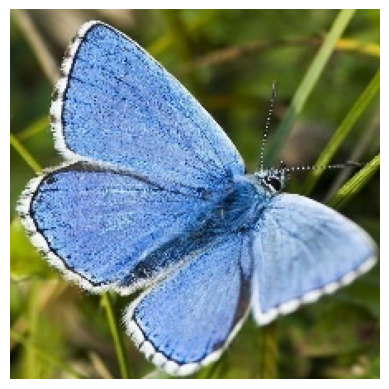

Image shape: (224, 224)
Image mode: RGB


In [71]:
from PIL import Image

def plot_image_from_path(img_path):  #this function plot the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img


image_path = data['path'].iloc[1]
image = plot_image_from_path(image_path)

print("Image shape:", image.size)
print("Image mode:", image.mode)

##### split data into training and validation data

In [72]:
from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(data, test_size=0.3, random_state=42)

In [73]:
train_data.head()

,filename,label,path
3758,Image_3759.jpg,BLUE MORPHO,Data/train/Image_3759.jpg
5879,Image_5880.jpg,ULYSES,Data/train/Image_5880.jpg
4907,Image_4908.jpg,BLUE MORPHO,Data/train/Image_4908.jpg
5198,Image_5199.jpg,WOOD SATYR,Data/train/Image_5199.jpg
4733,Image_4734.jpg,EASTERN DAPPLE WHITE,Data/train/Image_4734.jpg


In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [75]:
def prep_data(train_data, validation_data, batch_size=16):
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        rotation_range=40,        # Randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,    # Randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,   # Randomly shift images vertically (fraction of total height)
        shear_range=0.2,          # Randomly apply shear transformations
        zoom_range=0.2,           # Randomly zoom into images
        horizontal_flip=True,     # Randomly flip images horizontally
        fill_mode='nearest'       # Fill in new pixels that may appear after a transformation
    )
    
    train_set = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        x_col='path',
        y_col='label',
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='sparse'
    )

    validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    validation_set = validation_datagen.flow_from_dataframe(
        dataframe=validation_data,
        x_col='path',
        y_col='label',
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='sparse'
    )

    return train_set, validation_set

train_set, validation_set = prep_data(train_data, validation_data)

Found 4549 validated image filenames belonging to 75 classes.
Found 1950 validated image filenames belonging to 75 classes.


In [76]:
images, labels = next(train_set)

class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

In [77]:
train_size = train_set.samples
print(f"Size of training data: {train_size}")

Size of training data: 4549
